# Cross Validation
*Cross-validation is a step in the process of building a machine learning model which helps us ensure that our models fit the data accurately and also ensures that we do not overfit.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import missingno as msno
plt.style.use('ggplot')
%matplotlib inline

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


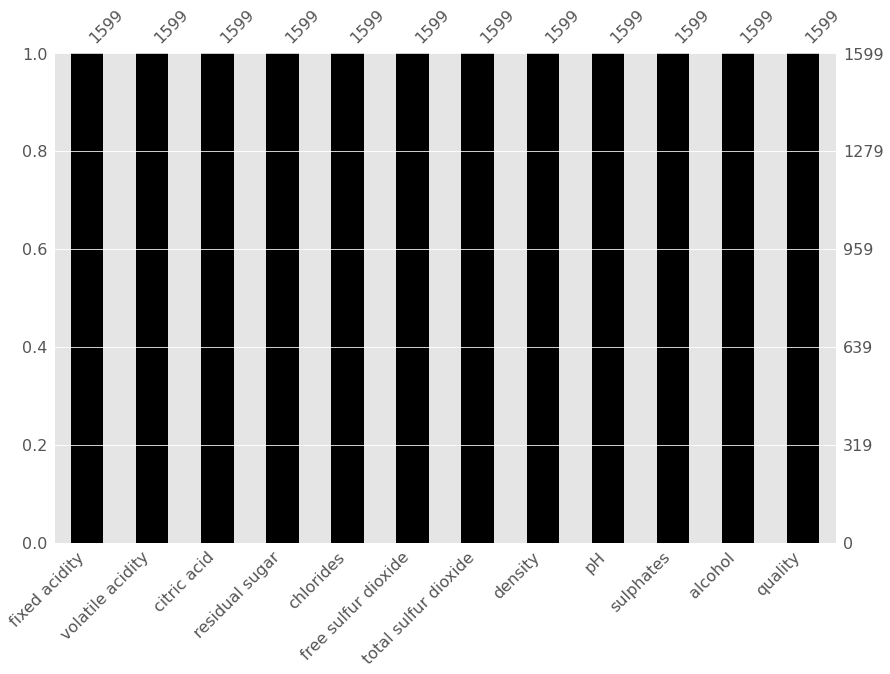

In [3]:
msno.bar(wine, figsize=(14,9), color='k')

In [4]:
wine.quality.nunique()

6

In [5]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [6]:
wine.quality.value_counts(normalize=True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

## Target mapping

In [7]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5,
}

wine.loc[:, 'quality'] = wine.quality.map(quality_mapping)

wine.quality.value_counts(normalize=True)

2    0.425891
3    0.398999
4    0.124453
1    0.033146
5    0.011257
0    0.006254
Name: quality, dtype: float64

## Data spliting

In [8]:
wine.shape

(1599, 12)

In [9]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [10]:
df = wine.copy()
df = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

In [11]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.9,0.660,0.00,1.4,0.096,6.0,13.0,0.99569,3.43,0.58,9.5,2
1,10.2,0.400,0.40,2.5,0.068,41.0,54.0,0.99754,3.38,0.86,10.5,3
2,8.8,0.420,0.21,2.5,0.092,33.0,88.0,0.99823,3.19,0.52,9.2,2
3,8.3,0.600,0.13,2.6,0.085,6.0,24.0,0.99840,3.31,0.59,9.2,3
4,8.3,0.715,0.15,1.8,0.089,10.0,52.0,0.99680,3.23,0.77,9.5,2


In [12]:
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1000,11.6,0.41,0.54,1.5,0.095,22.0,41.0,0.99735,3.02,0.76,9.9,4
1001,12.5,0.37,0.55,2.6,0.083,25.0,68.0,0.99950,3.15,0.82,10.4,3
1002,8.5,0.37,0.20,2.8,0.090,18.0,58.0,0.99800,3.34,0.70,9.6,3
1003,7.8,0.55,0.35,2.2,0.074,21.0,66.0,0.99740,3.25,0.56,9.2,2
1004,10.8,0.89,0.30,2.6,0.132,7.0,60.0,0.99786,2.99,1.18,10.2,2


In [13]:
feature_cols = df.columns[:-1].tolist()
feature_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [14]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(df_train[feature_cols], df_train.quality)

DecisionTreeClassifier(max_depth=3, random_state=42)

## Accuracy

In [15]:
train_pred = clf.predict(df_train[feature_cols])
test_pred = clf.predict(df_test[feature_cols])

train_acc = metrics.accuracy_score(df_train.quality, train_pred)
test_acc = metrics.accuracy_score(df_test.quality, test_pred)

print(f'Train Accuracy: {train_acc.round(3)}')
print(f'Test Accuracy: {test_acc.round(3)}')

Train Accuracy: 0.592
Test Accuracy: 0.576


### Increase max_depth

In [17]:
clf = tree.DecisionTreeClassifier(max_depth=7, random_state=42)
clf.fit(df_train[feature_cols], df_train.quality)

train_pred = clf.predict(df_train[feature_cols])
test_pred = clf.predict(df_test[feature_cols])

train_acc = metrics.accuracy_score(df_train.quality, train_pred)
test_acc = metrics.accuracy_score(df_test.quality, test_pred)

print(f'Train Accuracy: {train_acc.round(3)}')
print(f'Test Accuracy: {test_acc.round(3)}')

Train Accuracy: 0.748
Test Accuracy: 0.588


## max_depth vs accuracy plotting

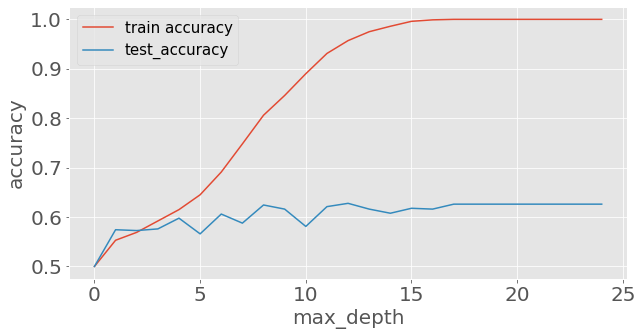

In [18]:
import matplotlib

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [.5]
test_accuracies = [.5]

for depth in range(1, 25):
  clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
  clf.fit(df_train[feature_cols], df_train.quality)

  train_pred = clf.predict(df_train[feature_cols])
  test_pred = clf.predict(df_test[feature_cols])

  train_acc = metrics.accuracy_score(df_train.quality, train_pred)
  test_acc = metrics.accuracy_score(df_test.quality, test_pred)

  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)


# Plotting acc vs max_depth
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='train accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend(loc='upper left', prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel('max_depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()

##  k-fold cross-validation

In [19]:
'''
# Training data is in a CSV file called train.csv
df = pd.read_csv("train.csv")

# we create a new column called kfold and fill it with -1
df["kfold"] = -1

# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

# initiate the kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)

# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold
    
# save the new csv with kfold column
df.to_csv("train_folds.csv", index=False)
'''

## stratified k-fold cross-validation


In [ ]:
'''
# Training data is in a csv file called train.csv
df = pd.read_csv("train.csv")

# we create a new column called kfold and fill it with -1
df["kfold"] = -1

# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

# fetch targets
y = df.target.values

# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)

# fill the new kfold column
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
    
# save the new csv with kfold column
df.to_csv("train_folds.csv", index=False)
'''